In [3]:
import pandas as pd
top_1000 = pd.read_json('data/mpd.slice.0-999.json')

df = top_1000['playlist']

ValueError: Expected object or value

In [4]:
import json
with open('/home/jovyan/work/Documents/dsi/Capstone1/data/mpd.slice.0-999.json') as f:
  data = json.load(f)
pd.json_normalize(data['playlists'],max_level=2)

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Throwbacks,false,0,1493424000,52,47,1,"[{'pos': 0, 'artist_name': 'Missy Elliott', 't...",6,11532414,37,NaN
1,Awesome Playlist,false,1,1506556800,39,23,1,"[{'pos': 0, 'artist_name': 'Survivor', 'track_...",5,11656470,21,NaN
2,korean,false,2,1505692800,64,51,1,"[{'pos': 0, 'artist_name': 'Hoody', 'track_uri...",18,14039958,31,NaN
3,mat,false,3,1501027200,126,107,1,"[{'pos': 0, 'artist_name': 'Camille Saint-Saën...",4,28926058,86,NaN
4,90s,false,4,1401667200,17,16,2,"[{'pos': 0, 'artist_name': 'The Smashing Pumpk...",7,4335282,16,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,"[{'pos': 0, 'artist_name': 'Katrina', 'track_u...",8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,"[{'pos': 0, 'artist_name': 'PARTYNEXTDOOR', 't...",13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,"[{'pos': 0, 'artist_name': 'LoveRance', 'track...",63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,"[{'pos': 0, 'artist_name': 'Hunter Hayes', 'tr...",37,24950143,40,NaN


In [5]:
import json
import matplotlib.pyplot as plt
with open('/home/jovyan/work/Documents/dsi/Capstone1/data/mpd.slice.0-999.json') as f:
  data = json.load(f)
df = pd.json_normalize(data['playlists'],record_path='tracks',meta=['name','pid'])
df1 = df.copy()
df1.head()

,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,name,pid
0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,Throwbacks,0
1,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone,Throwbacks,0
2,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit),Throwbacks,0
3,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified,Throwbacks,0
4,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot,Throwbacks,0


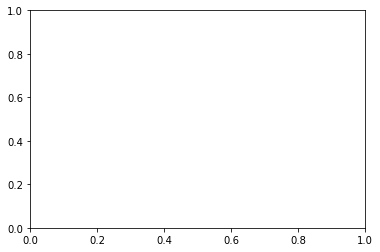

In [4]:
import numpy as np
names = np.array(df1['artist_name'].copy)
fig, ax = plt.subplots()


<BarContainer object of 5 artists>

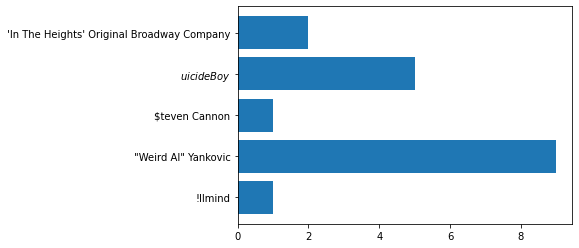

In [5]:
arr = df1.loc[:,'artist_name'].sort_values(ascending=False).values
unique = np.unique(arr)
(unique, counts) = np.unique(arr, return_counts=True)
frequencies = np.asarray((unique, counts)).T
fig, ax = plt.subplots()
ax.barh(frequencies[:5,0],frequencies[:5,1])

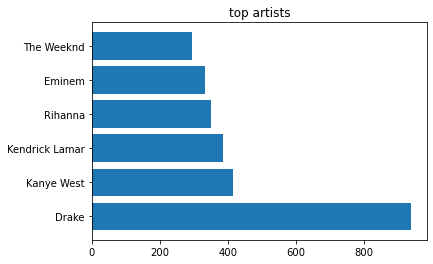

In [13]:
arr = df1.loc[:,'artist_name']
arr
artists_grouped = df1.groupby('artist_name').count().sort_values('track_name',ascending=False).reset_index().copy()
counts = artists_grouped.loc[:6,['artist_name','track_name']]
a_name = np.array(counts['artist_name'])
a_count = np.array(counts['track_name'])
fig, ax = plt.subplots()
ax.barh(a_name[:6],a_count[:6])
ax.set_title('top artists');

In [14]:
a_name1 = np.array(artists_grouped['artist_name'])
dba = pd.read_csv('/home/luke/Documents/dsi/Capstone1/data/data_by_artist.csv')
dba.head()
len(dba['artists'][np.isin(dba['artists'],a_name1)])

4792

In [15]:
len(a_name1)

9722

In [16]:
top_stats = dba[np.isin(dba['artists'],a_name)].copy()
top_stats.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
7847,Drake,0.190538,0.674018,248293.503836,0.577266,2.736054e-03,0.181801,-7.480949,0.216310,118.395619,0.391614,63.452685,1,1,391
8691,Eminem,0.137215,0.734854,262197.690141,0.745300,8.206148e-04,0.233695,-4.991451,0.279618,115.158963,0.565777,58.278873,1,1,355
15038,Kanye West,0.205292,0.600863,247586.782443,0.649066,1.552681e-02,0.268353,-6.195634,0.207987,117.889443,0.454581,61.419847,1,1,262
15324,Kendrick Lamar,0.215335,0.641123,266676.580247,0.682574,2.619362e-04,0.270391,-6.866031,0.272675,116.312049,0.464895,62.283951,1,1,162
16712,Lil Uzi Vert,0.123448,0.781462,219393.193277,0.603681,6.938655e-07,0.178278,-6.509395,0.204490,130.804160,0.430076,68.210084,1,0,119


In [17]:
top_s = top_stats.loc[:,['artists','acousticness','danceability','energy','valence','tempo','popularity']].copy()
top_s


,artists,acousticness,danceability,energy,valence,tempo,popularity
7847,Drake,0.190538,0.674018,0.577266,0.391614,118.395619,63.452685
8691,Eminem,0.137215,0.734854,0.745300,0.565777,115.158963,58.278873
15038,Kanye West,0.205292,0.600863,0.649066,0.454581,117.889443,61.419847
15324,Kendrick Lamar,0.215335,0.641123,0.682574,0.464895,116.312049,62.283951
16712,Lil Uzi Vert,0.123448,0.781462,0.603681,0.430076,130.804160,68.210084
23875,Rihanna,0.154517,0.653338,0.693772,0.514159,120.599193,64.620690
29282,The Weeknd,0.278703,0.588035,0.598192,0.332277,125.803820,65.348837


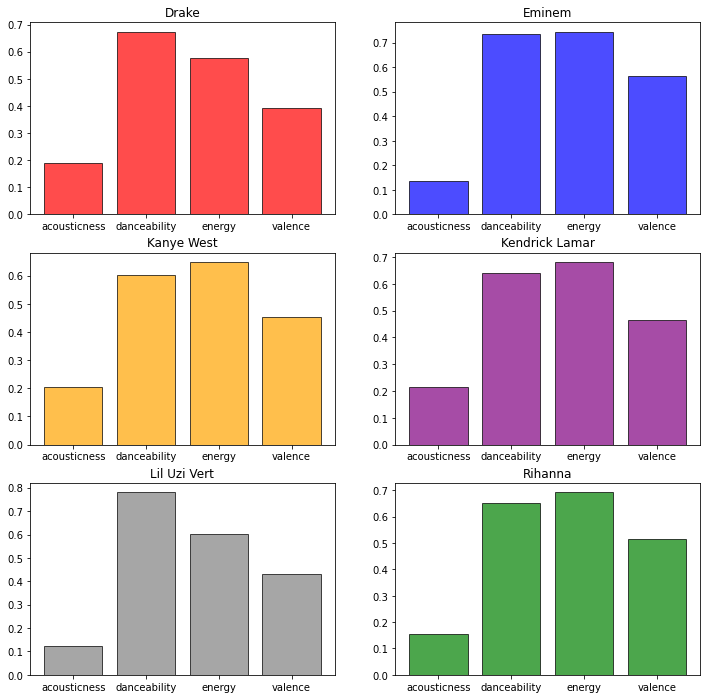

In [18]:
bars = list(top_s.columns)[1:5]
colors = ['red','blue','orange','purple','gray','green']
fig, ax = plt.subplots(3,2,figsize=(12,12))
for idx, axs in enumerate(ax.flatten()):
    heights = np.array(top_s.iloc[idx,1:5])
    axs.bar(bars,heights,color=colors[idx],edgecolor="black",alpha=.7)
    axs.set_title(top_s.iloc[idx,0])

In [19]:
list(top_s.columns)[1:]

['acousticness', 'danceability', 'energy', 'valence', 'tempo', 'popularity']